In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [253]:
df= pd.read_csv('Cust_Data.csv')
df_dbscan = df.copy()

In [254]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Unnamed: 9,Gender
0,0,0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,NaN,M
1,1,1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,NaN,M
2,2,2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,NaN,M
3,3,3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,NaN,F
4,4,4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,NaN,M


In [255]:
# Preprocessing: To extract pincode and state using Address

def pin_code_extractor(address):
    match = re.search(r'([0-9]{5}-[0-9]{4})$',address) or re.search(r'([0-9]{5})$',address)
    if match:
        return match.group(1)
    else:
        return None


def state_extractor(address):
    match = re.search(r'(\w{2})\s(?:[0-9]{5}-[0-9]{4})$',address) or re.search(r'(\w{2})\s(?:[0-9]{5})$',address)
    if match:
        return match.group(1)
    else:
        return None

    
df['pincode']=df['Address'].apply(pin_code_extractor)
df['state']=df['Address'].apply(state_extractor)


In [256]:
df.isnull().sum()
df.drop(['Unnamed: 0.1','Unnamed: 0','Unnamed: 9', 'Address'],axis=1,inplace=True)

In [292]:
df[['Time on App','Avg. Session Length']].describe()

,Time on App,Avg. Session Length
count,5.000000e+02,500.000000
mean,-8.962830e-16,33.053194
std,1.001002e+00,0.992563
min,-3.568527e+00,29.532429
25%,-6.688689e-01,32.341822
50%,-6.972938e-02,33.082008
75%,7.061488e-01,33.711985
max,3.095491e+00,36.139662


In [291]:
df.isnull().sum()

Email                   0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
pincode                 0
state                   0
Total Time              0
Cluster                 0
dtype: int64

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Avatar                500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
 7   Gender                500 non-null    object 
 8   pincode               500 non-null    object 
 9   state                 500 non-null    object 
dtypes: float64(5), object(5)
memory usage: 39.2+ KB


In [260]:
df.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,pincode,state
0,mstephenson@fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,M,82180-9605,MI
1,hduke@hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,M,06566-8576,CA
2,pallen@yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,M,99414-7564,DC
3,riverarebecca@gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,F,22070-1220,OH
4,mstephens@davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,M,37242-1057,PR


In [261]:
print(df['pincode'].nunique(),df['state'].nunique())


500 62


<AxesSubplot:>

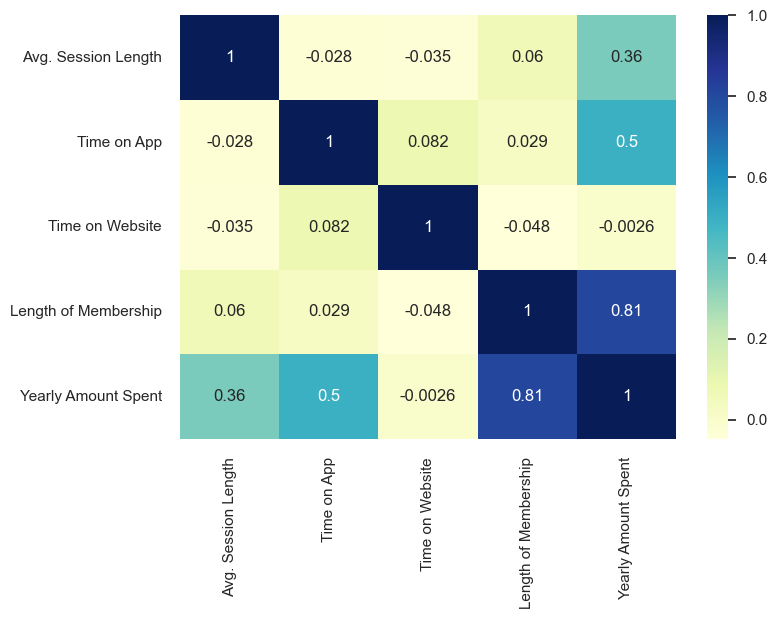

In [251]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

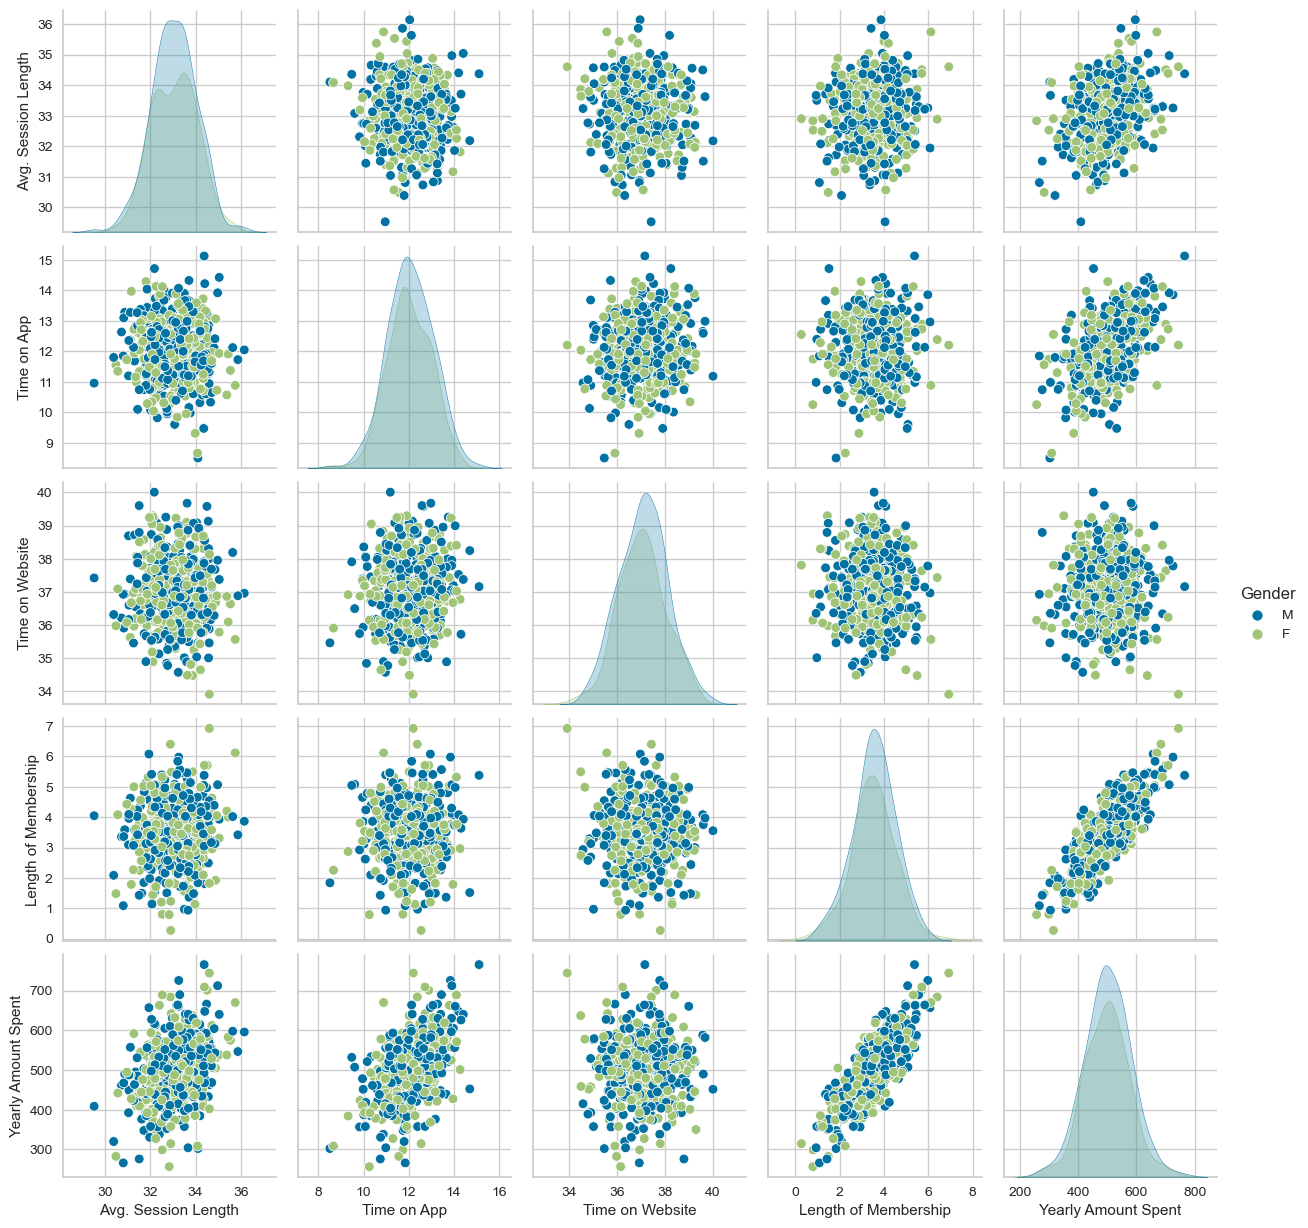

In [142]:
sns.pairplot(df,hue='Gender')

In [252]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue='Avatar')

<Figure size 2000x2000 with 0 Axes>

Error in callback <function flush_figures at 0x7f87a5ce64c0> (for post_execute):


KeyboardInterrupt: 

<Figure size 2000x2000 with 0 Axes>

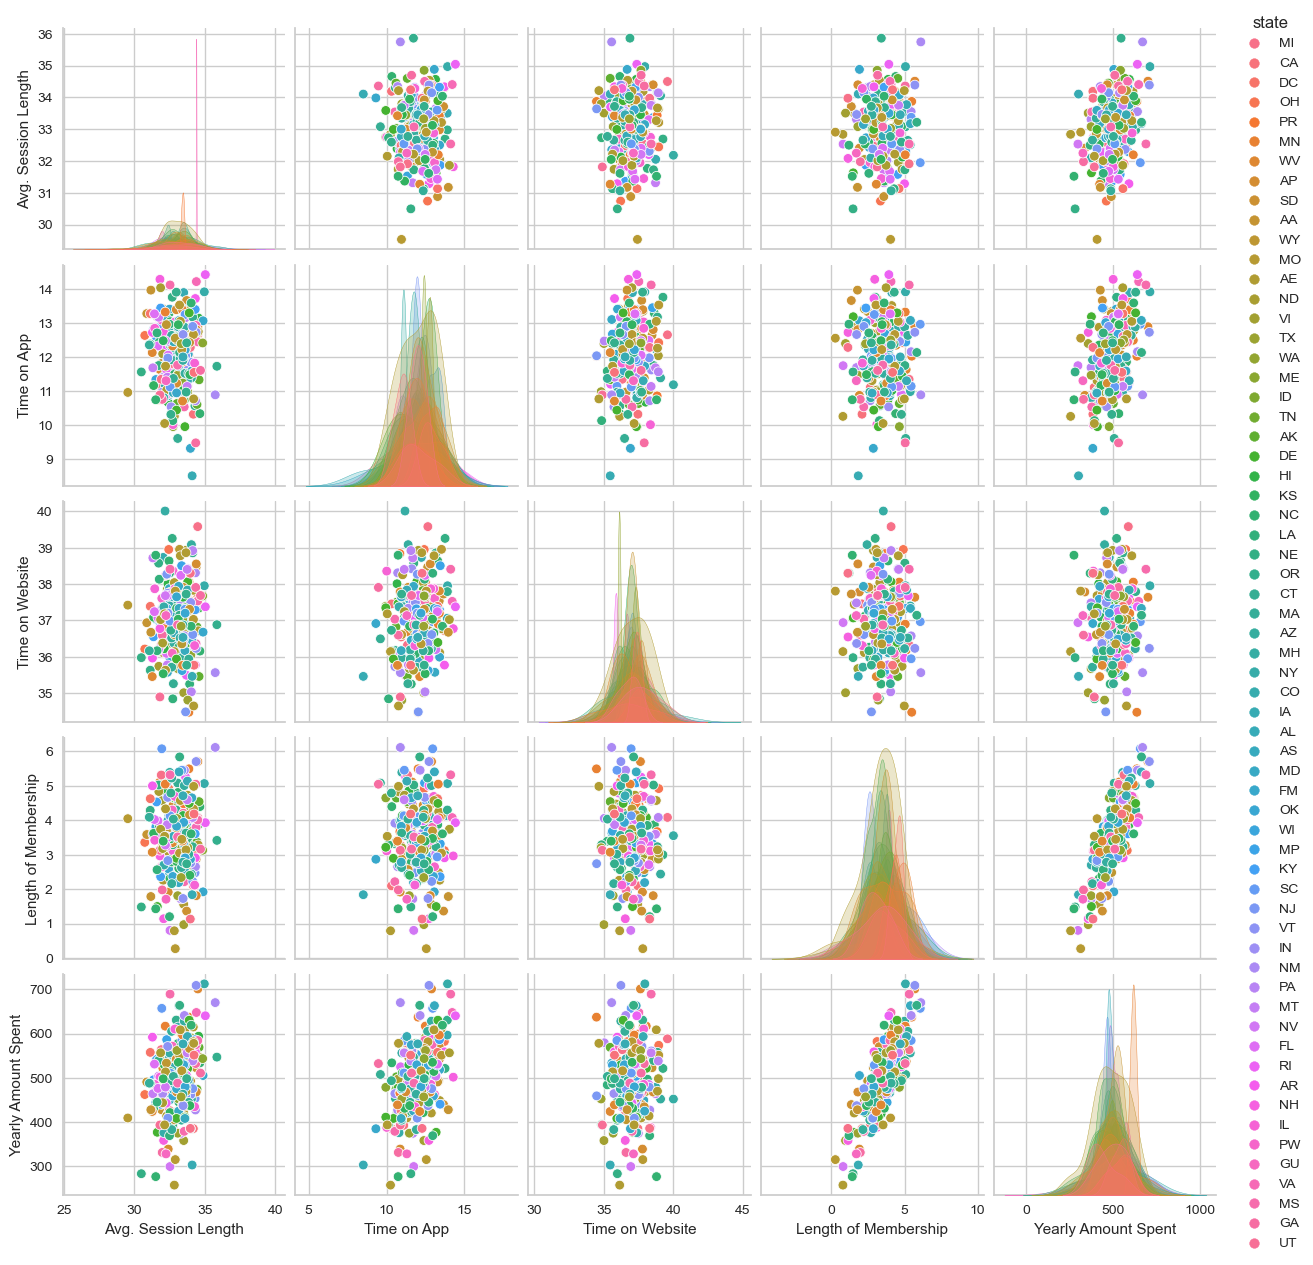

In [144]:
plt.figure(figsize=(20,20))
sns.pairplot(df,hue='state')

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Avatar', ylabel='count'>

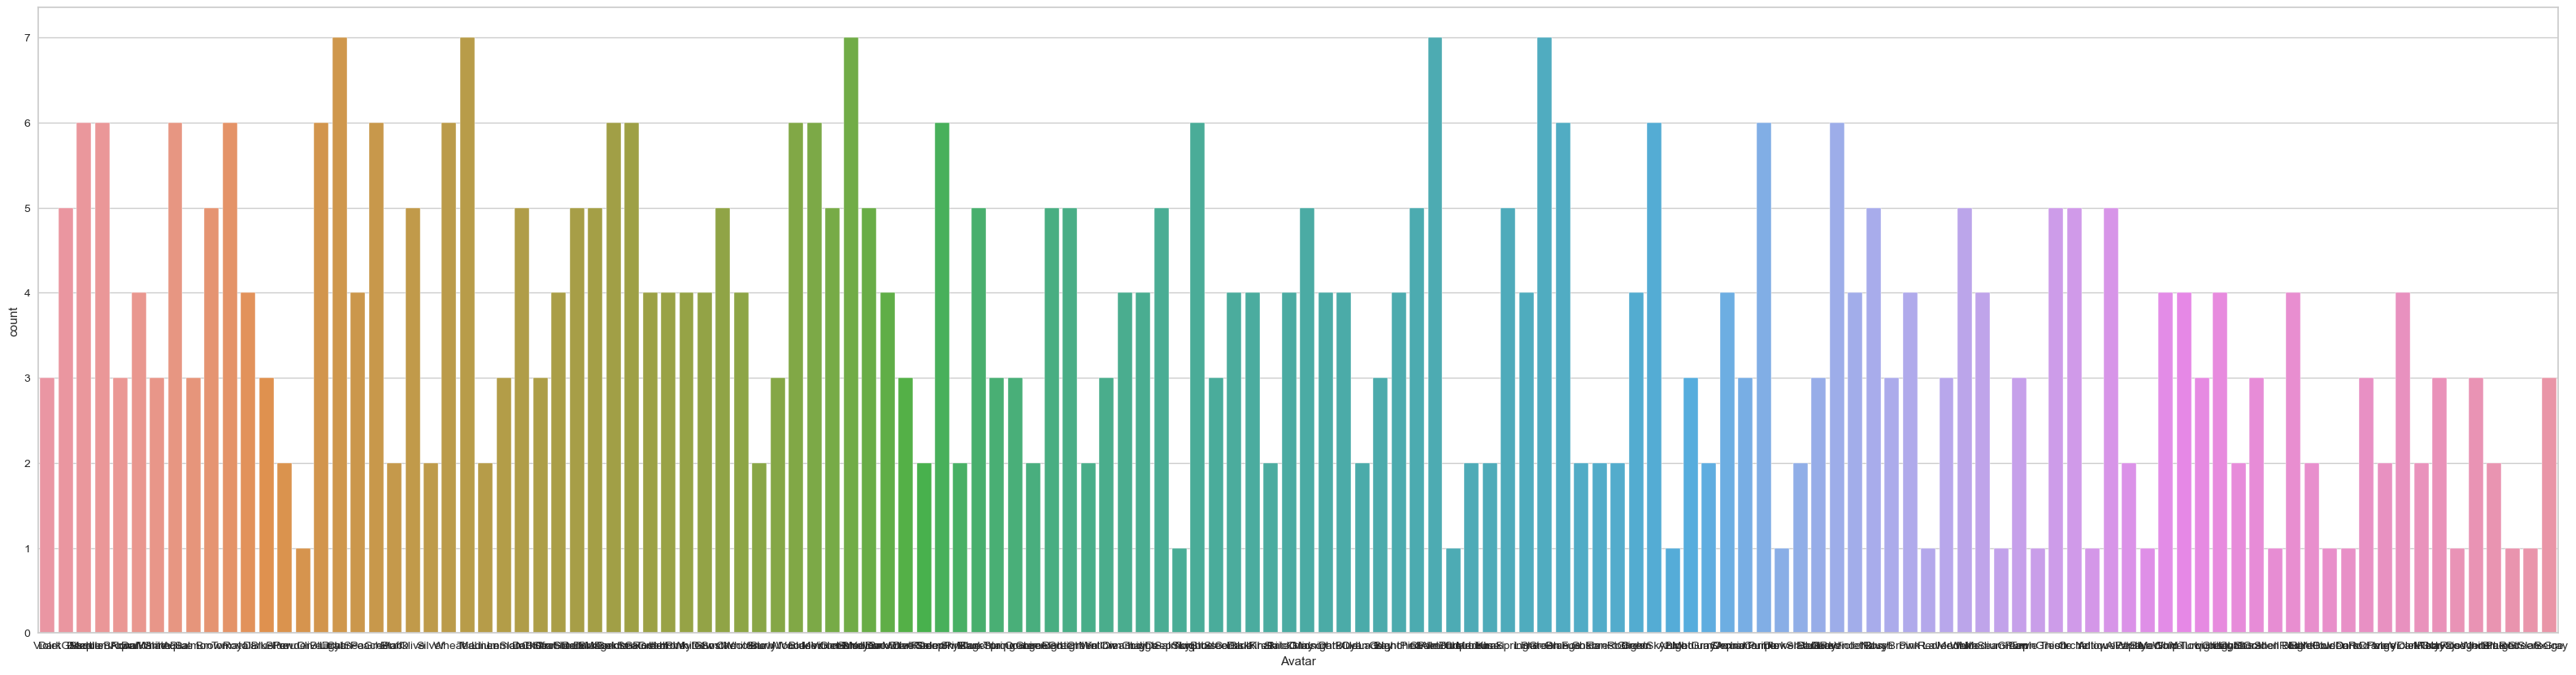

In [145]:
plt.figure(figsize=(40,10))
sns.countplot(df['Avatar'])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='state', ylabel='count'>

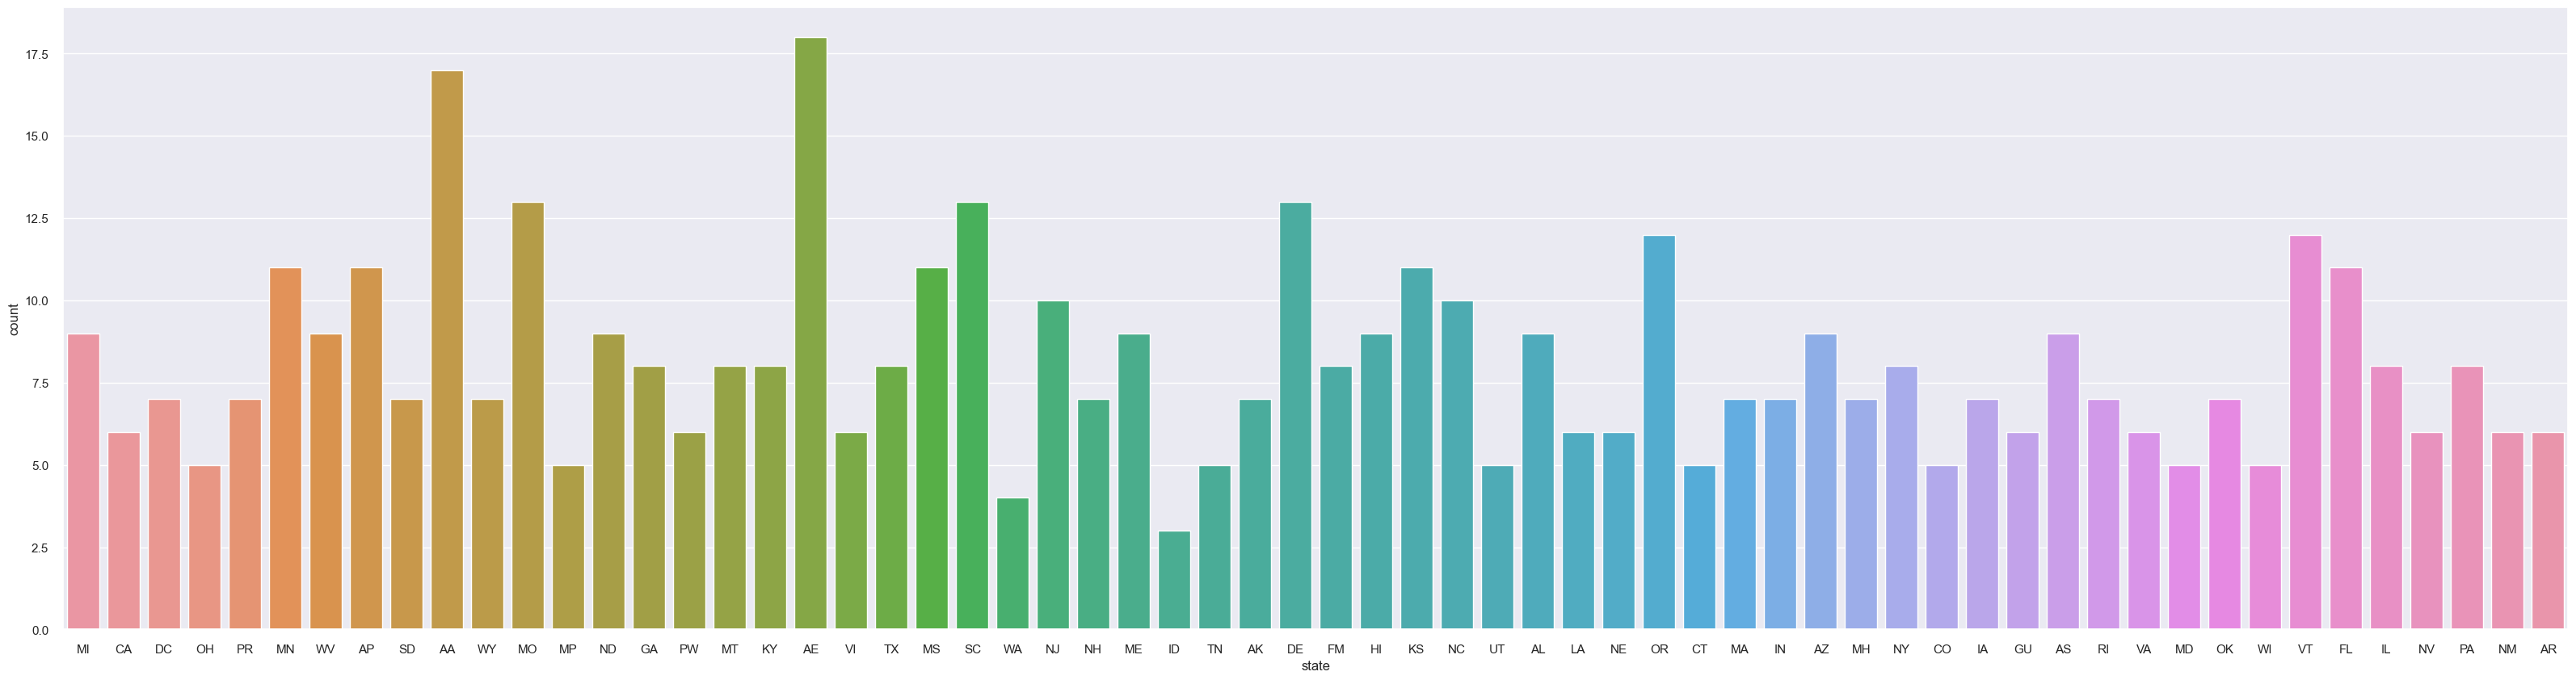

In [277]:
plt.figure(figsize=(40,10))
sns.countplot(df['state'])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='Length of Membership', ylabel='Density'>

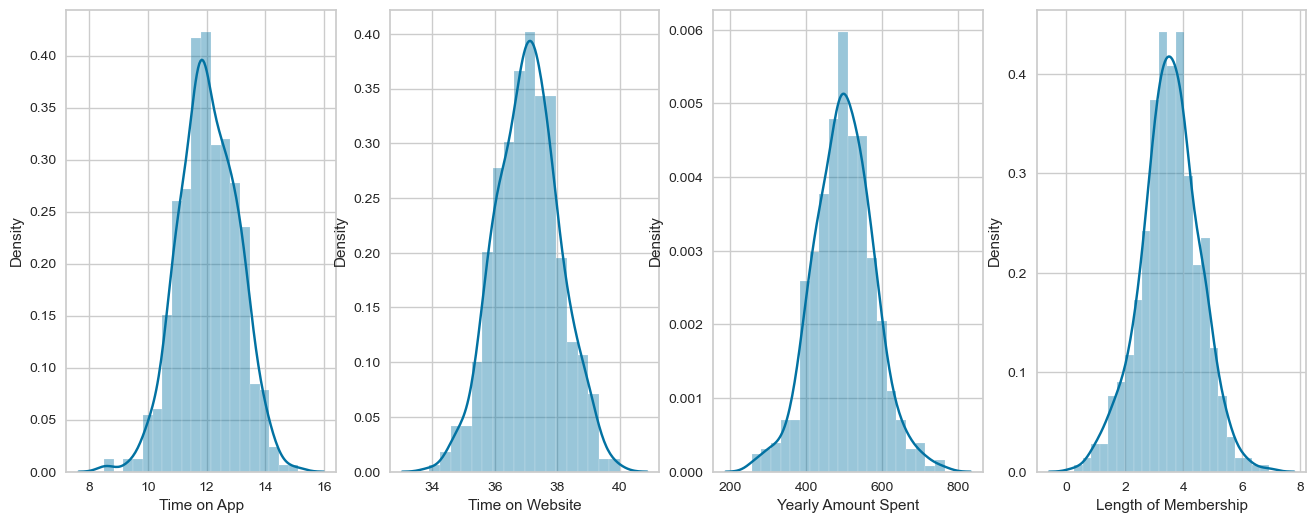

In [147]:
plt.figure(figsize=(16,6))

plt.subplot(1,4,1)
sns.distplot(df['Time on App'])

plt.subplot(1,4,2)
sns.distplot(df['Time on Website'])

plt.subplot(1,4,3)
sns.distplot(df['Yearly Amount Spent'])

plt.subplot(1,4,4)
sns.distplot(df['Length of Membership'])




/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Session Length', ylabel='Density'>

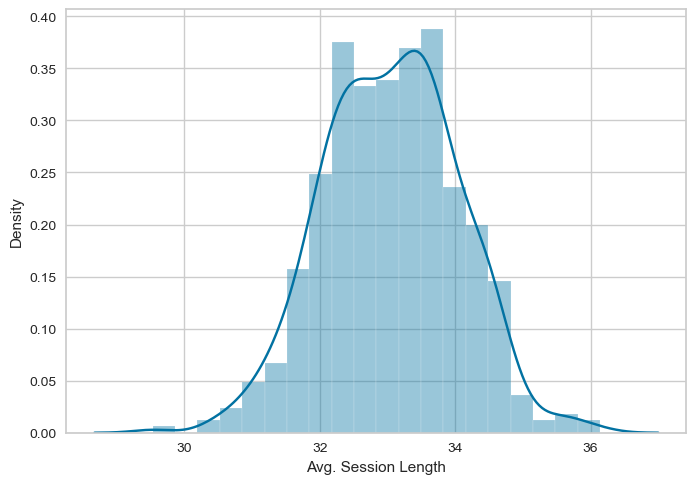

In [148]:
df.columns


sns.distplot(df['Avg. Session Length'])

# Imp to run before Kmeans

In [262]:
df['Total Time']=df['Time on App']+df['Time on Website']

In [263]:
df.head()

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,pincode,state,Total Time
0,mstephenson@fernandez.com,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,M,82180-9605,MI,52.233319
1,hduke@hotmail.com,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,M,06566-8576,CA,48.378420
2,pallen@yahoo.com,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,M,99414-7564,DC,48.440875
3,riverarebecca@gmail.com,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,F,22070-1220,OH,50.438796
4,mstephens@davidson-herman.com,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,M,37242-1057,PR,50.331842


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


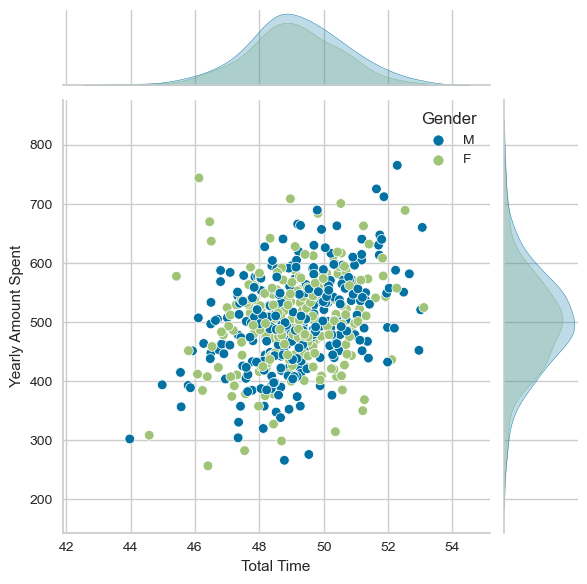

In [151]:
sns.jointplot('Total Time','Yearly Amount Spent',data = df,hue='Gender')

<AxesSubplot:>

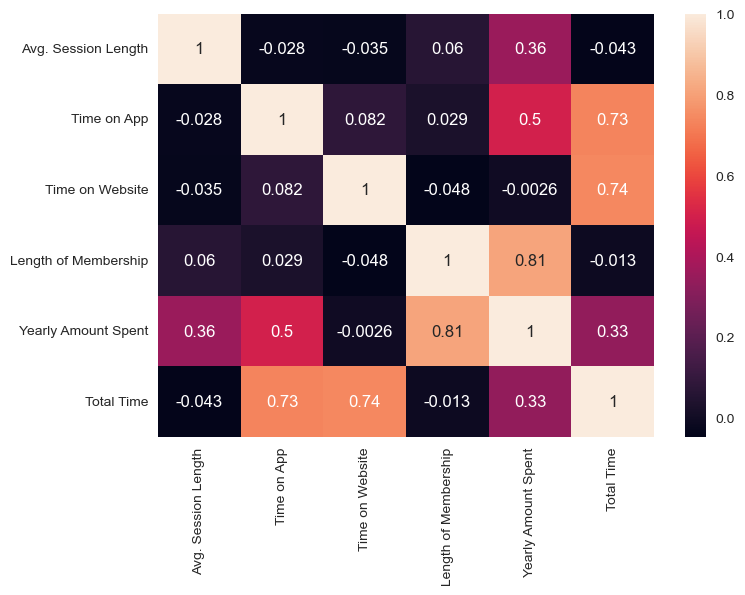

In [152]:
sns.heatmap(df.corr(),annot=True)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


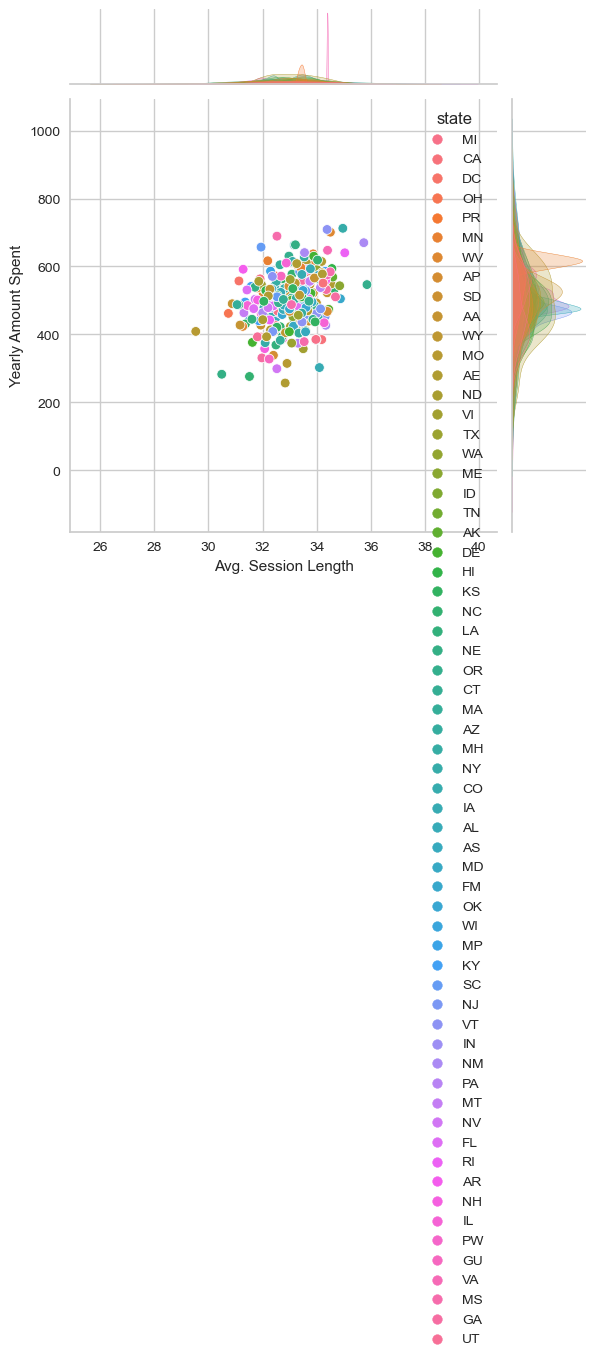

In [153]:
sns.jointplot(df['Avg. Session Length'],df['Yearly Amount Spent'],hue=df['state'])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 4000x500 with 0 Axes>

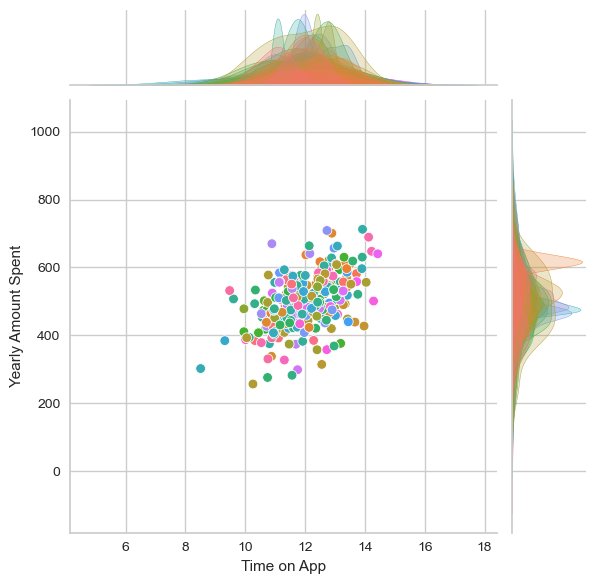

In [154]:
plt.figure(figsize=(40,5))
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'],hue=df['state'],legend=False)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 4000x500 with 0 Axes>

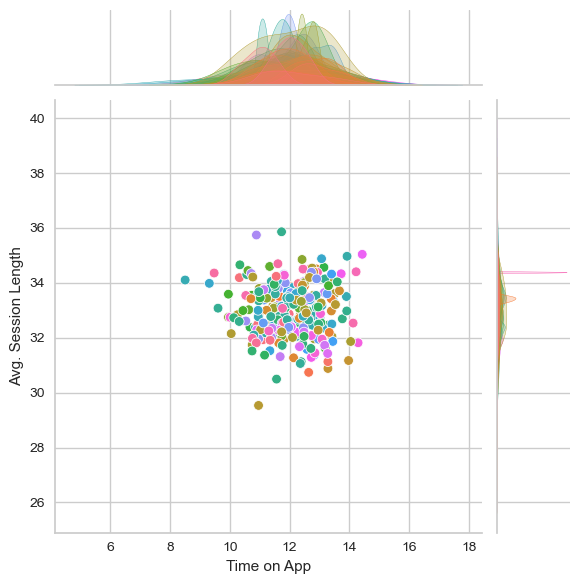

In [155]:
plt.figure(figsize=(40,5))
sns.jointplot(df['Time on App'],df['Avg. Session Length'],hue=df['state'],legend=False)

In [264]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [265]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df.iloc[:,3:8]=sc.fit_transform(df.iloc[:,3:8])
df.iloc[:,10:]=sc.fit_transform(df.iloc[:,10:])

df.head(10)

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,pincode,state,Total Time
0,mstephenson@fernandez.com,Violet,34.497268,0.607280,2.493589,0.550107,1.118654,0.897248,82180-9605,MI,2.117893
1,hduke@hotmail.com,DarkGreen,31.926272,-0.949464,0.206556,-0.870927,-1.351783,0.897248,06566-8576,CA,-0.498535
2,pallen@yahoo.com,Bisque,33.000915,-0.727139,0.049681,0.572067,-0.148501,0.897248,99414-7564,DC,-0.456144
3,riverarebecca@gmail.com,SaddleBrown,34.305557,1.676390,-0.335978,-0.413996,1.041684,-1.114519,22070-1220,OH,0.899900
4,mstephens@davidson-herman.com,MediumAquaMarine,33.330673,0.747770,0.471737,0.914422,1.263224,0.897248,37242-1057,PR,0.827307
5,alvareznancy@lucas.biz,FloralWhite,33.871038,-0.025737,-2.559311,1.963427,1.738975,-1.114519,67218-7250,MN,-1.770890
6,katherine20@yahoo.com,DarkSlateBlue,32.021596,-0.690823,-0.373133,1.153542,0.280911,-1.114519,92213-0247,WV,-0.721358
7,awatkins@yahoo.com,Aqua,32.739143,0.301515,0.309976,0.902366,0.638478,0.897248,09026-4941,AP,0.415642
8,vchurch@walter-martinez.com,Salmon,33.987773,1.342851,0.469601,-0.260477,0.894630,0.897248,97450-0495,SD,1.227004
9,bonnie69@lin.biz,Brown,31.936549,-0.239987,0.083927,-0.331226,-0.910131,-1.114519,98456-7482,AA,-0.104278


# ML-MODEL BUILDING AND OPTIMIZATIONS

In [266]:
X=df[["Total Time","Yearly Amount Spent"]].values
X

array([[ 2.11789285e+00,  1.11865385e+00],
       [-4.98534968e-01, -1.35178302e+00],
       [-4.56144406e-01, -1.48500915e-01],
       [ 8.99900173e-01,  1.04168437e+00],
       [ 8.27307178e-01,  1.26322350e+00],
       [-1.77088954e+00,  1.73897478e+00],
       [-7.21358029e-01,  2.80911422e-01],
       [ 4.15642416e-01,  6.38478389e-01],
       [ 1.22700376e+00,  8.94629755e-01],
       [-1.04277606e-01, -9.10131440e-01],
       [ 9.85409866e-01, -8.46594230e-02],
       [-2.98792498e-01,  2.90569095e-01],
       [-4.96434727e-01, -1.14435790e+00],
       [-6.13608451e-03,  9.35210824e-01],
       [ 4.45075412e-01, -3.64247484e-01],
       [-1.78209651e-01, -4.73693365e-01],
       [-1.68662447e+00, -5.23330836e-01],
       [ 8.72435412e-01, -1.15616832e+00],
       [ 2.61077347e+00, -5.93148349e-01],
       [ 1.40304116e+00,  1.33459242e+00],
       [-9.47835397e-02,  4.46665171e-01],
       [ 8.18594471e-01, -1.00176482e+00],
       [ 2.03593639e+00, -7.92554983e-01],
       [-4.

In [267]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

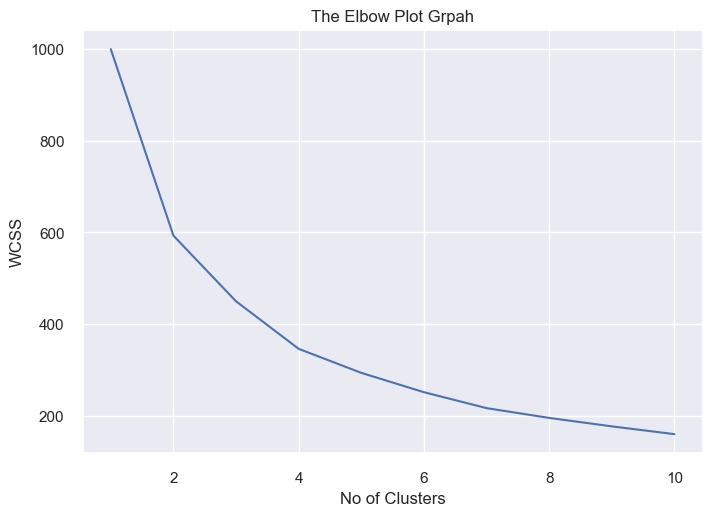

In [268]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Plot Grpah')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [269]:
X=df[["Total Time","Yearly Amount Spent"]].values
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)
df['Cluster']=kmeans.fit_predict(X)


<IPython.core.display.Javascript object>

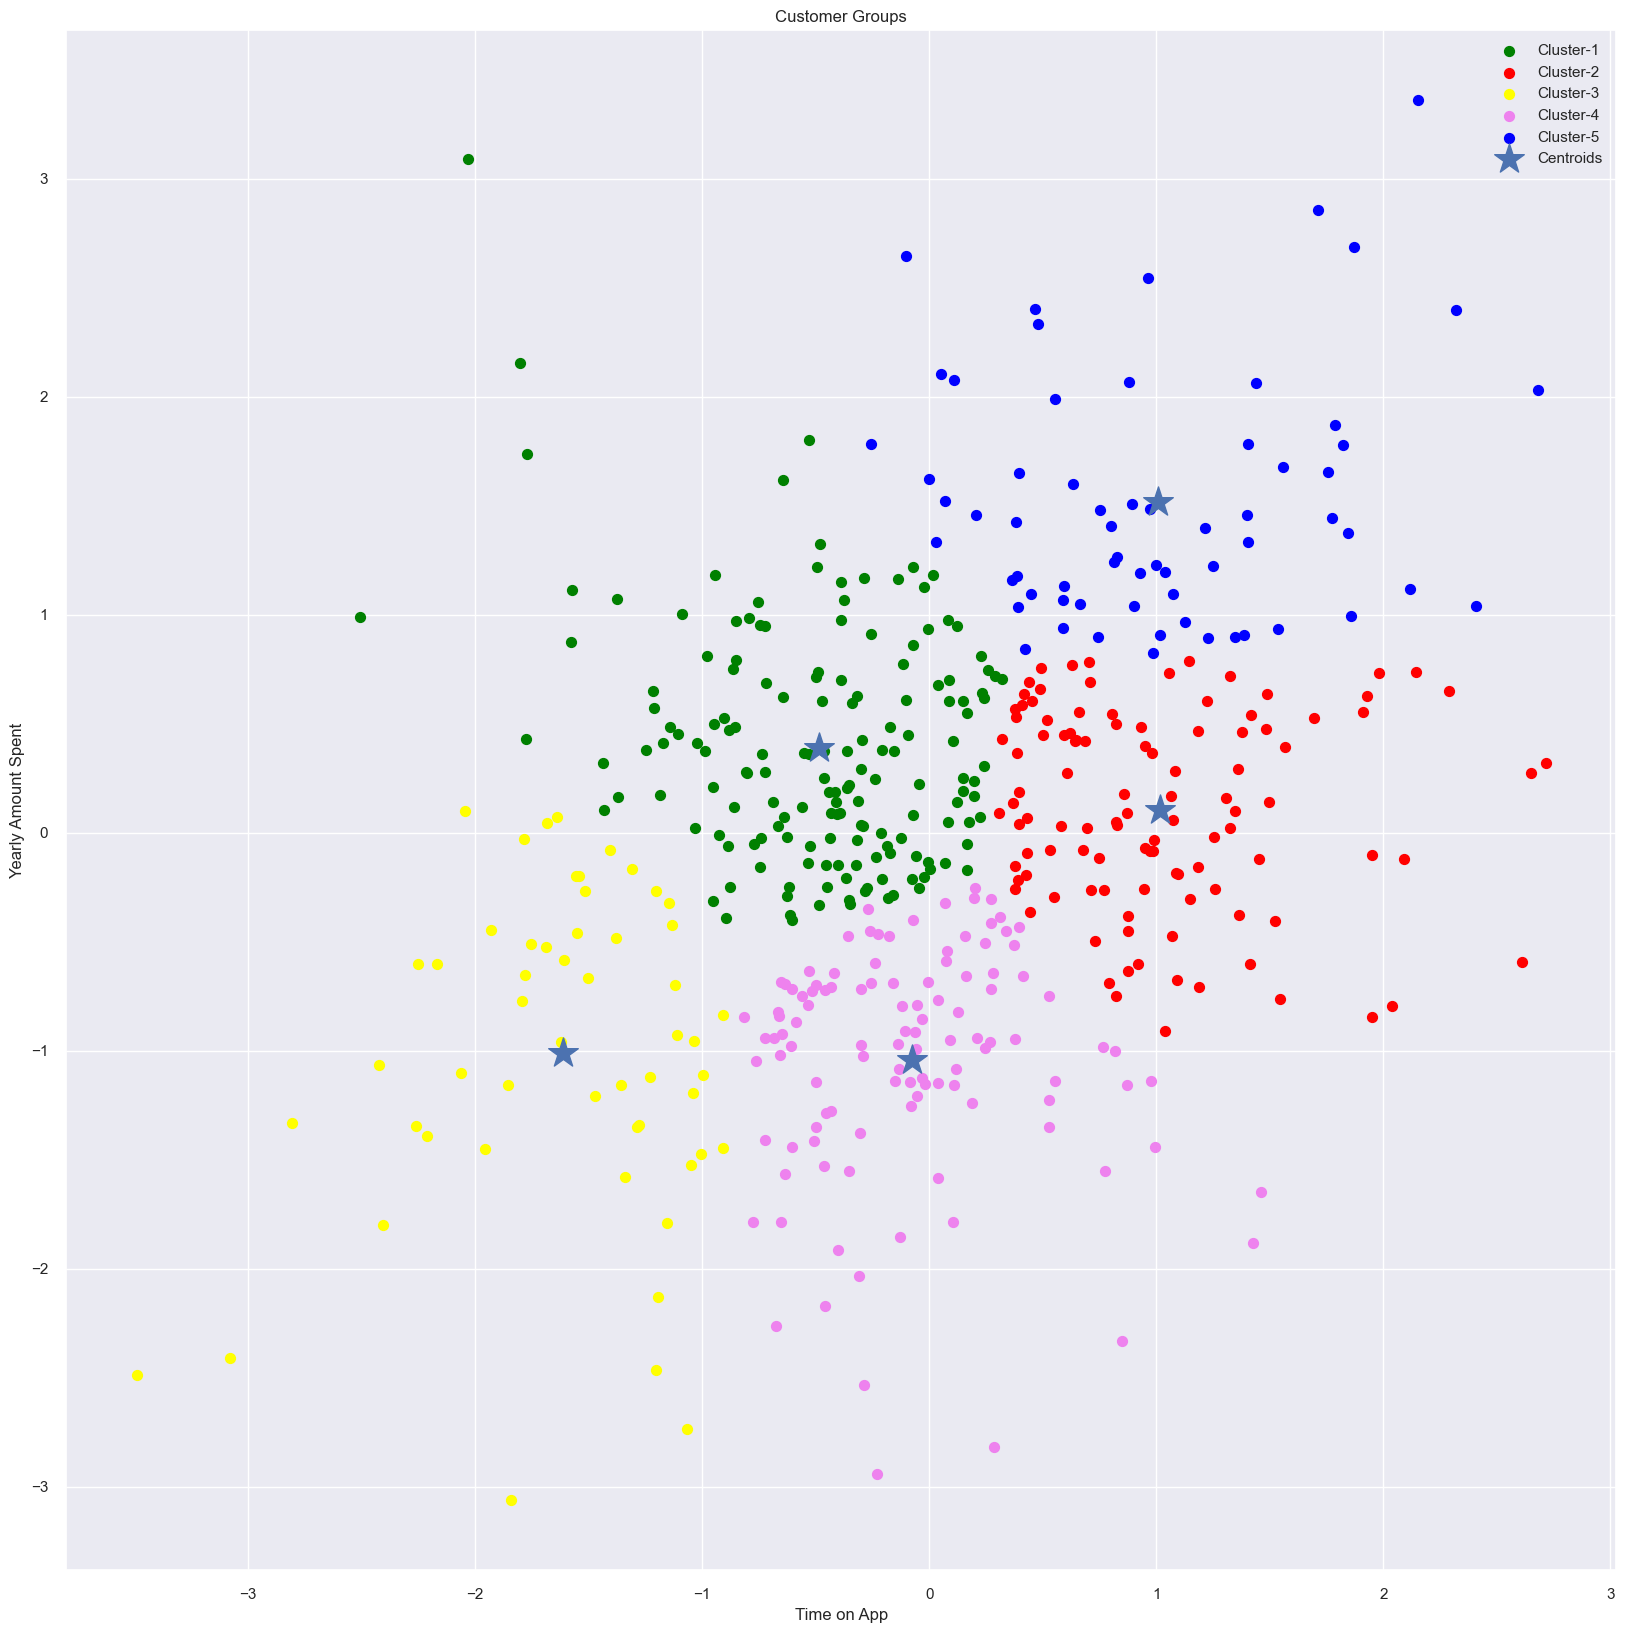

In [270]:
plt.figure(figsize=(20,20))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster-1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster-2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster-3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster-4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster-5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='b',marker="*",s=500,label='Centroids')
plt.legend()
plt.title('Customer Groups')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

In [271]:
from sklearn.metrics import silhouette_score


score = silhouette_score(X, kmeans.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.327


In [272]:

from yellowbrick.cluster import SilhouetteVisualizer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

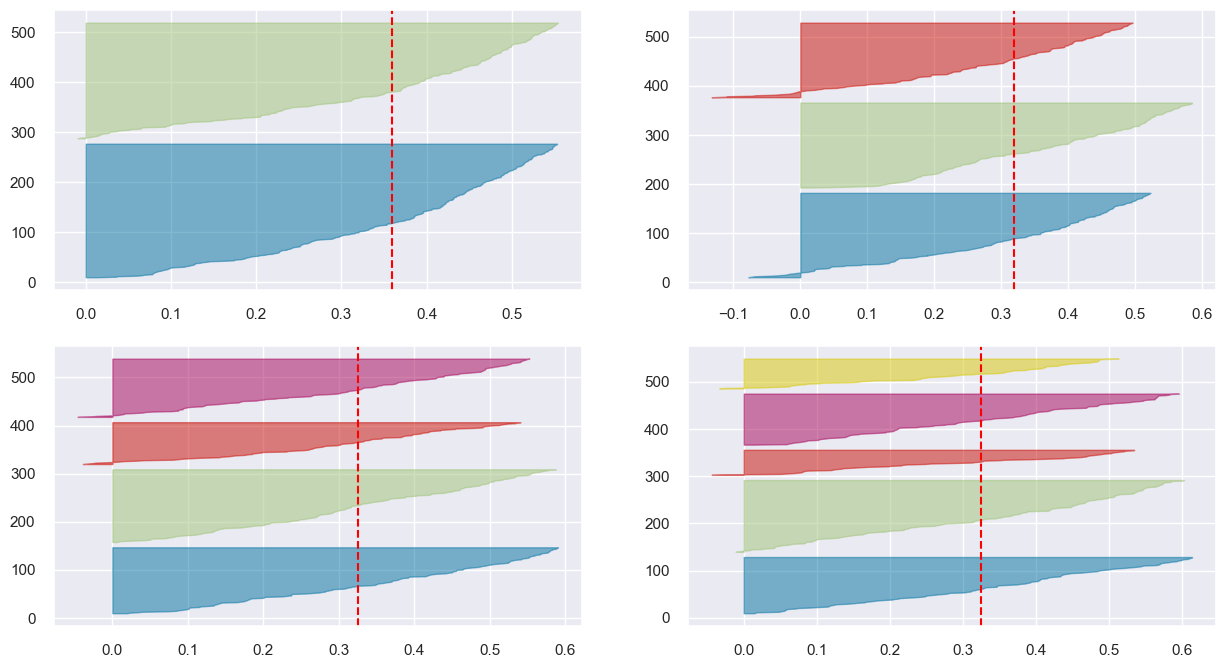

In [273]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in range(2,6):
  
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [274]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)
df['Cluster']=kmeans.fit_predict(X)

<IPython.core.display.Javascript object>

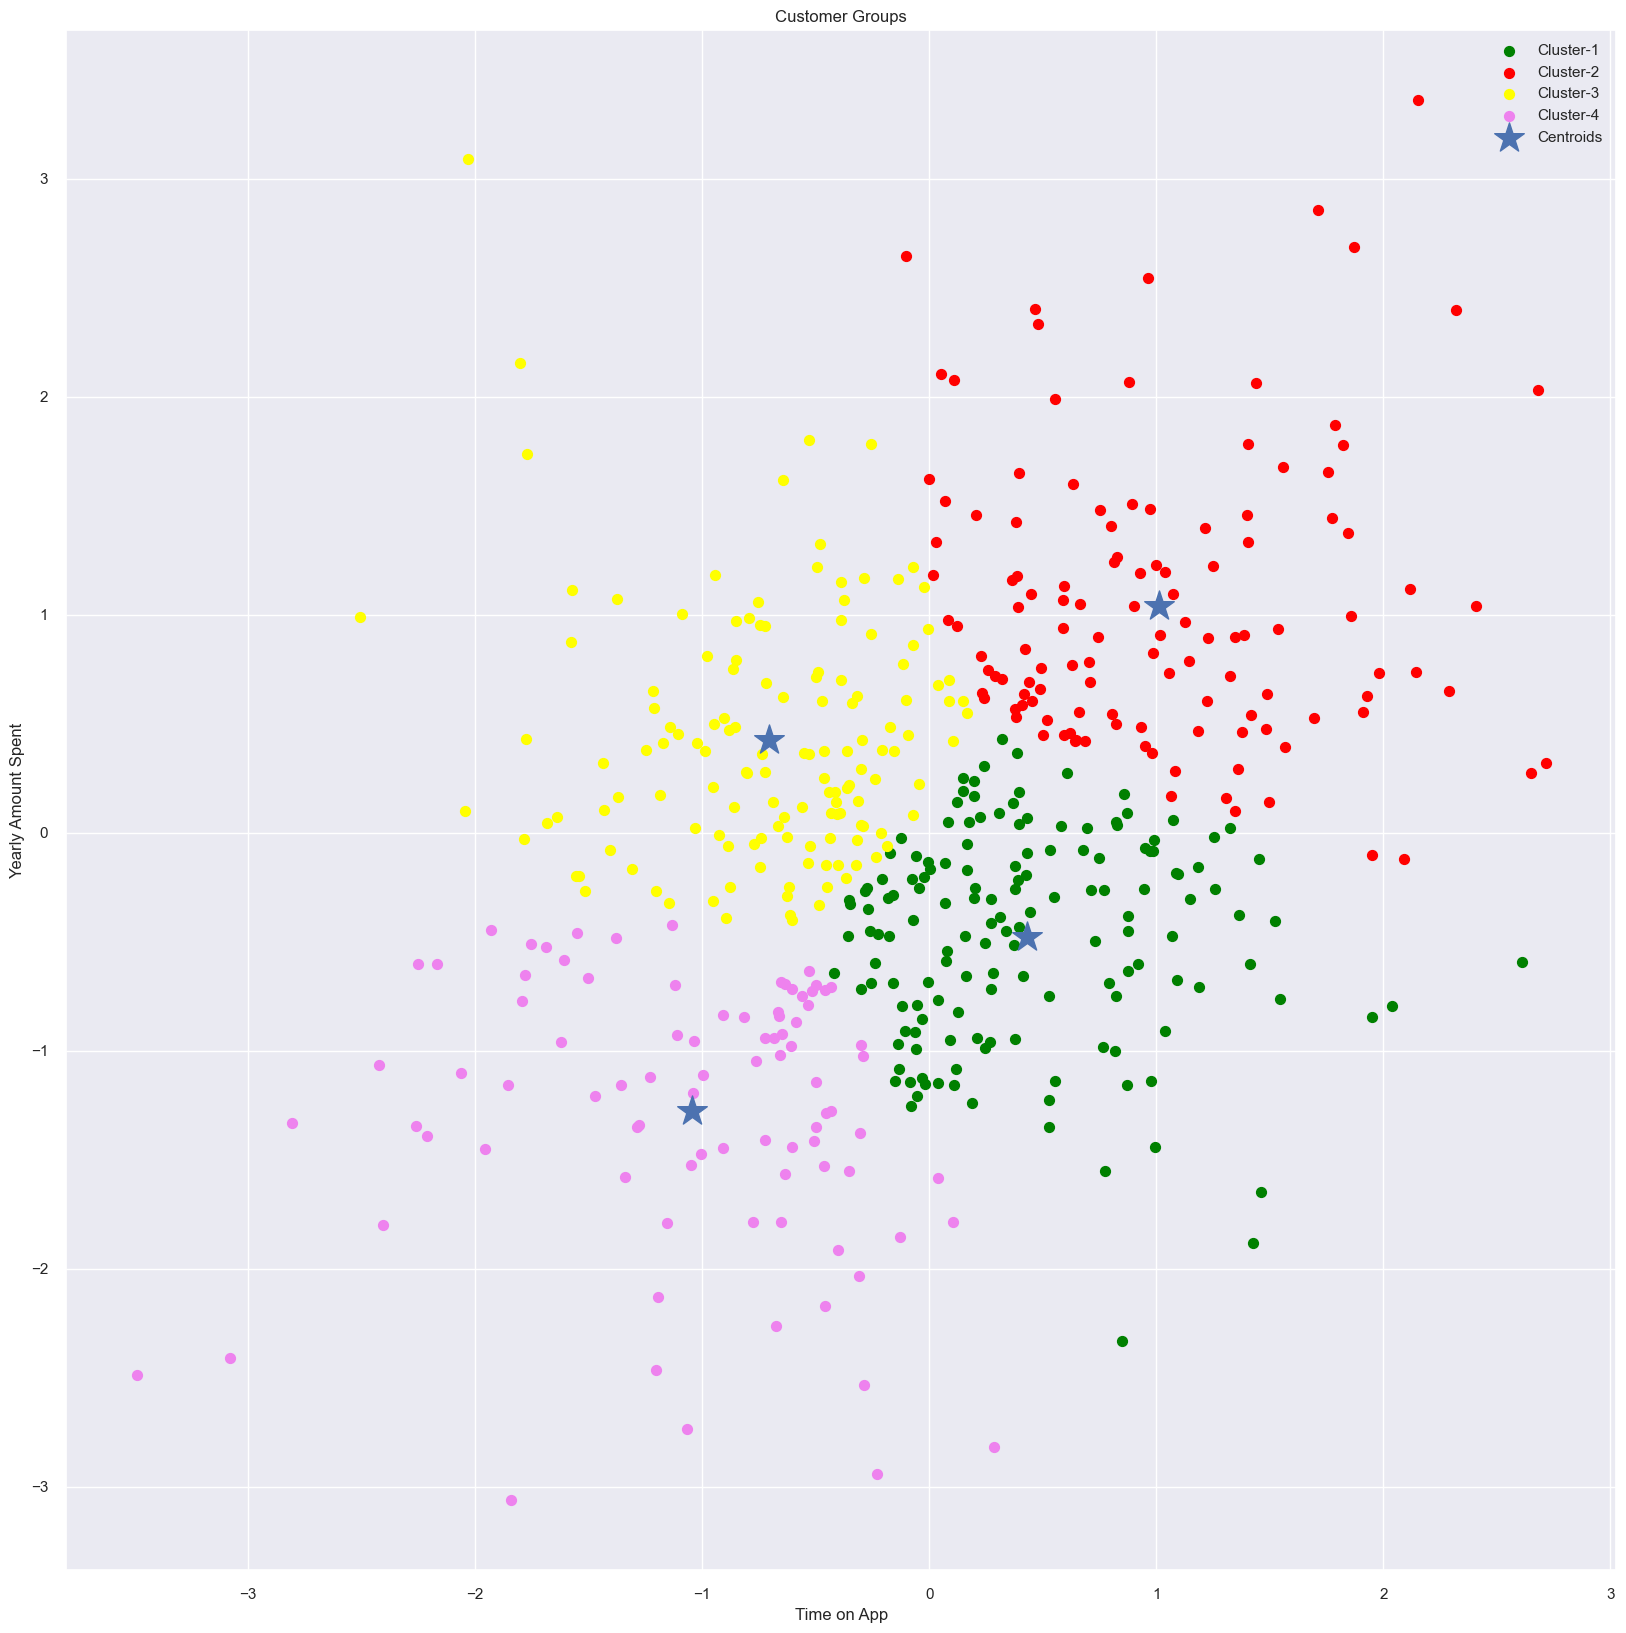

In [275]:
plt.figure(figsize=(20,20))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster-1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster-2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster-3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster-4')
# plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster-5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='b',marker="*",s=500,label='Centroids')
plt.legend()
plt.title('Customer Groups')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.show()

# Saving csv for app

In [280]:
df_most_valuable=df[df['Cluster']==1]
df_more_attention=df[df['Cluster']==0]
df_bit_attention=df[df['Cluster']==2]
df_most_attention=df[df['Cluster']==3]

most_valuable = df_most_valuable.to_csv("most_val.csv")
bit_attention = df_bit_attention.to_csv("bit_attention.csv")
more_atttention = df_more_attention.to_csv("more_attention.csv")
most_attention = df_most_attention.to_csv("most_attention.csv")

#  Hierarchical Clustering

In [278]:
from sklearn.preprocessing import normalize

data=df.copy()
df.head(20)

,Email,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender,pincode,state,Total Time,Cluster
0,mstephenson@fernandez.com,Violet,34.497268,0.607280,2.493589,0.550107,1.118654,0.897248,82180-9605,MI,2.117893,1
1,hduke@hotmail.com,DarkGreen,31.926272,-0.949464,0.206556,-0.870927,-1.351783,0.897248,06566-8576,CA,-0.498535,3
2,pallen@yahoo.com,Bisque,33.000915,-0.727139,0.049681,0.572067,-0.148501,0.897248,99414-7564,DC,-0.456144,2
3,riverarebecca@gmail.com,SaddleBrown,34.305557,1.676390,-0.335978,-0.413996,1.041684,-1.114519,22070-1220,OH,0.899900,1
4,mstephens@davidson-herman.com,MediumAquaMarine,33.330673,0.747770,0.471737,0.914422,1.263224,0.897248,37242-1057,PR,0.827307,1
5,alvareznancy@lucas.biz,FloralWhite,33.871038,-0.025737,-2.559311,1.963427,1.738975,-1.114519,67218-7250,MN,-1.770890,2
6,katherine20@yahoo.com,DarkSlateBlue,32.021596,-0.690823,-0.373133,1.153542,0.280911,-1.114519,92213-0247,WV,-0.721358,2
7,awatkins@yahoo.com,Aqua,32.739143,0.301515,0.309976,0.902366,0.638478,0.897248,09026-4941,AP,0.415642,1
8,vchurch@walter-martinez.com,Salmon,33.987773,1.342851,0.469601,-0.260477,0.894630,0.897248,97450-0495,SD,1.227004,1
9,bonnie69@lin.biz,Brown,31.936549,-0.239987,0.083927,-0.331226,-0.910131,-1.114519,98456-7482,AA,-0.104278,0


In [169]:
data.drop(["Email","Avatar","Gender",'state','pincode','Cluster'],axis=1,inplace=True)

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Total Time
0,34.497268,0.607280,2.493589,0.550107,1.118654,2.117893
1,31.926272,-0.949464,0.206556,-0.870927,-1.351783,-0.498535
2,33.000915,-0.727139,0.049681,0.572067,-0.148501,-0.456144
3,34.305557,1.676390,-0.335978,-0.413996,1.041684,0.899900
4,33.330673,0.747770,0.471737,0.914422,1.263224,0.827307


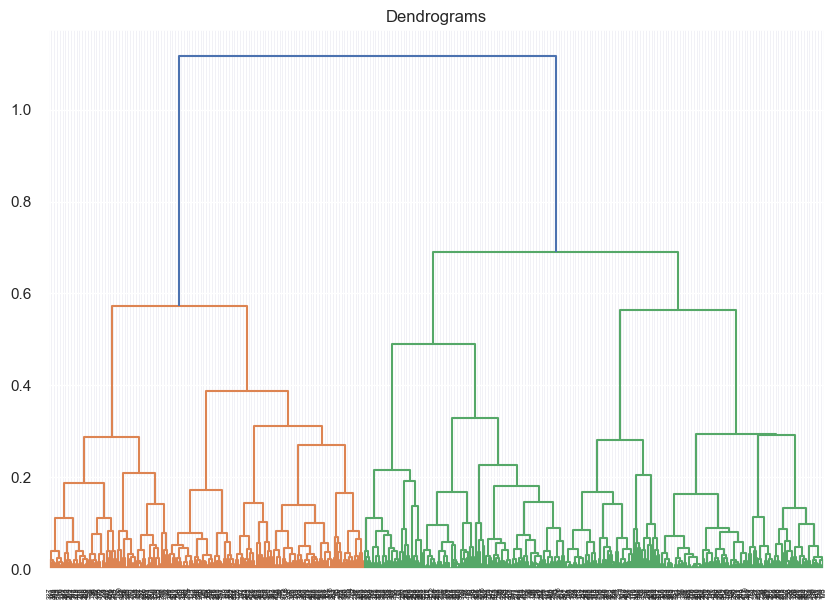

In [170]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

# DBSCAN

In [194]:
from sklearn.cluster import DBSCAN

array([[ 2.11789285e+00,  1.11865385e+00],
       [-4.98534968e-01, -1.35178302e+00],
       [-4.56144406e-01, -1.48500915e-01],
       [ 8.99900173e-01,  1.04168437e+00],
       [ 8.27307178e-01,  1.26322350e+00],
       [-1.77088954e+00,  1.73897478e+00],
       [-7.21358029e-01,  2.80911422e-01],
       [ 4.15642416e-01,  6.38478389e-01],
       [ 1.22700376e+00,  8.94629755e-01],
       [-1.04277606e-01, -9.10131440e-01],
       [ 9.85409866e-01, -8.46594230e-02],
       [-2.98792498e-01,  2.90569095e-01],
       [-4.96434727e-01, -1.14435790e+00],
       [-6.13608451e-03,  9.35210824e-01],
       [ 4.45075412e-01, -3.64247484e-01],
       [-1.78209651e-01, -4.73693365e-01],
       [-1.68662447e+00, -5.23330836e-01],
       [ 8.72435412e-01, -1.15616832e+00],
       [ 2.61077347e+00, -5.93148349e-01],
       [ 1.40304116e+00,  1.33459242e+00],
       [-9.47835397e-02,  4.46665171e-01],
       [ 8.18594471e-01, -1.00176482e+00],
       [ 2.03593639e+00, -7.92554983e-01],
       [-4.

In [189]:
epsilons = np.linspace(1, 10, num=20)
epsilons

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [190]:
min_samples = np.arange(2, 30, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])

In [191]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(1.0, 2),
 (1.0, 5),
 (1.0, 8),
 (1.0, 11),
 (1.0, 14),
 (1.0, 17),
 (1.0, 20),
 (1.0, 23),
 (1.0, 26),
 (1.0, 29),
 (1.4736842105263157, 2),
 (1.4736842105263157, 5),
 (1.4736842105263157, 8),
 (1.4736842105263157, 11),
 (1.4736842105263157, 14),
 (1.4736842105263157, 17),
 (1.4736842105263157, 20),
 (1.4736842105263157, 23),
 (1.4736842105263157, 26),
 (1.4736842105263157, 29),
 (1.9473684210526314, 2),
 (1.9473684210526314, 5),
 (1.9473684210526314, 8),
 (1.9473684210526314, 11),
 (1.9473684210526314, 14),
 (1.9473684210526314, 17),
 (1.9473684210526314, 20),
 (1.9473684210526314, 23),
 (1.9473684210526314, 26),
 (1.9473684210526314, 29),
 (2.4210526315789473, 2),
 (2.4210526315789473, 5),
 (2.4210526315789473, 8),
 (2.4210526315789473, 11),
 (2.4210526315789473, 14),
 (2.4210526315789473, 17),
 (2.4210526315789473, 20),
 (2.4210526315789473, 23),
 (2.4210526315789473, 26),
 (2.4210526315789473, 29),
 (2.894736842105263, 2),
 (2.894736842105263, 5),
 (2.894736842105263, 8),
 (2.894

In [199]:
N = len(combinations)
N
X=df_dbscan[["Time on App","Yearly Amount Spent"]].values
X

array([[ 12.65565115, 587.95105397],
       [ 11.10946073, 392.20493344],
       [ 11.33027806, 487.54750487],
       [ 13.71751367, 581.85234404],
       [ 12.79518855, 599.40609205],
       [ 12.02692534, 637.10244792],
       [ 11.36634831, 521.57217476],
       [ 12.35195897, 549.90414611],
       [ 13.38623528, 570.20040896],
       [ 11.81412829, 427.1993849 ],
       [ 13.33897545, 492.60601272],
       [ 11.584783  , 522.33740461],
       [ 10.9612984 , 408.64035107],
       [ 12.95922609, 573.41586733],
       [ 13.14872569, 470.4527333 ],
       [ 12.63660605, 461.7807422 ],
       [ 11.73386169, 457.84769594],
       [ 12.01319469, 407.70454755],
       [ 14.71538754, 452.31567548],
       [ 13.98959256, 605.0610388 ],
       [ 11.36549203, 534.70574381],
       [ 12.8779837 , 419.93877484],
       [ 13.37856278, 436.51560573],
       [ 11.65757592, 519.34098913],
       [ 12.8936695 , 700.91709162],
       [ 11.76581265, 423.17999168],
       [ 12.78389178, 619.89563986],
 

In [200]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
 #To ignore the irrelevant labels   
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(silhouette_score(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (1.0, 2) on iteration 1 of 200 has 86 clusters. Moving on
Index: 1, Score: -0.34585973524861463, Labels: [-1 18  1 -1 -1 -1  0 -1 -1 -1 10  0  8 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  2 -1  3 -1 -1 -1 -1  0 -1 -1 -1 -1 21 14 -1  6 -1 -1 -1 -1
  4 -1 -1  5 -1 -1  0  7 -1 -1  3  6 -1 -1 -1  7 -1 -1 -1 -1  8 15  5 -1
 -1 19 -1  4  5 -1 -1 22 -1 -1 -1 -1 -1 -1  1 -1  6 12 -1 -1 -1 -1 -1 13
  0 -1 12  9 -1 -1 -1 10 -1  3  9 -1 -1 -1 -1 10 11 -1 -1 -1  4 -1 12 -1
 23 23 -1  9 -1 -1 -1 -1  6 -1 -1 -1 15 13  8  7  2 -1 -1 -1 -1 -1 -1 -1
 -1 12 -1 -1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 19 -1 -1 -1  3 -1
 -1 14 -1 -1 -1 -1 -1 -1 21 -1 -1 14 -1 -1 16 15 23 -1 11 -1 -1  4 -1 -1
 -1 -1 -1 11 -1 -1 -1 -1 -1 -1  5 18 -1 -1 -1 -1 -1 -1  3 -1 19 -1 -1 20
 -1  2 -1 -1 -1 -1 14 -1 -1 -1  6 -1 -1 -1 21 -1 -1 -1 16 14 14 -1 -1 -1
 -1 -1 15 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 22 -1 -1 -1 -1 -1
 -1 -1 

Index: 34, Score: -0.18008658822063137, Labels: [-1 -1  8 -1 -1 -1 -1  7 -1 -1  5 -1 10 -1 -1 -1 -1 10 -1 -1  0 -1 -1 -1
 -1  6 -1  8 -1 -1  3  4 -1  5  1 -1 -1  5  2  0  0  1 -1  7 -1  7 -1 -1
  2 -1 -1  4 -1 -1 -1  8 -1 -1  3  7 -1  1 -1 -1 -1 -1 -1 -1 10 -1  4 -1
 -1  0 -1  2  4 -1  8  2  5 -1 -1 -1  0  0  8 -1  7  1 -1 -1 -1 -1  9 -1
 -1 -1  1  3 -1 -1  6  5 10  3  3 -1 -1  7 -1  5  6  6 -1 -1  2 -1  1 -1
 -1 -1  9  3  9 -1 -1 -1  7 -1 -1 -1 -1 -1 10 -1 -1 -1  2 -1 -1 -1 -1 -1
 -1  1 -1  2  6 -1 -1 -1 -1 -1 -1  1 -1 -1  9 -1 -1 -1  0  5  7  9  3 -1
  1  1  6 -1 -1 -1 -1 -1  0 -1  0  1 -1 -1  5 -1 -1  8 -1  0 -1  2 -1  2
  1  7 -1  6 -1 -1 -1 -1  1 -1  4 -1 -1 -1 -1 -1 -1 -1  3  7  0 -1 -1 -1
 -1 -1  6  3 -1 -1  1 -1 -1 -1  7 -1 -1 -1  0  9 -1 -1  5  1  1 -1  6  0
 -1 -1 -1  5 -1 10 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  9 -1  8
 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  4 -1  6 -1 -1  4  9 -1  2 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1  1  9 -1 -1 -1  5 -1 -1  3 -1 -1  4 -1 -1  2  1
 -1

Index: 53, Score: 0.18944568745578463, Labels: [ 5 -1  0  3 -1 -1  0  1  3  4  0  0  2  3  0  0  0  2 -1 -1  1  4  7  0
 -1  4 -1  0  1  1  0  6  5  0  0  0 -1  0  0  1  1  0  5  1  6  1  5 -1
  0 -1 -1  6 -1  6  0  0  0 -1  0  1 -1  0 -1  0  1 -1  1  0  2  6  6  5
  4  1  3  0  6  1  0  0  0  0  5 -1  1  1  0  0  1  0  6 -1  0  6  0  1
  0 -1  0  0  0 -1  4  0  2  0  0 -1  3  1  0  0  4  4 -1  2  0  5  0  3
  3  3  0  0  0  1  0  0  1  7  1  3 -1  1  2  0  1  7  0  6  6  0  0 -1
  0  0  0  0  4  0  4 -1  1 -1  5  0 -1 -1  0  1  0 -1  1  0  1  0  0  3
  0  0  4  6 -1 -1  0 -1  1  1  1  0  0  1  0  6  3  0  4  1  0  0 -1  0
  0  1  7  4 -1 -1  1  0  0  5  6 -1  3 -1  2  1  2  0  0  1  1  1 -1  1
 -1  1  4  0  0  5  0 -1  1 -1  1  0  0  7  1  0 -1  0  0  0  0 -1  4  1
 -1  3  6  0  5  2  1 -1  6  0  0 -1  4  0  0  0  3  3 -1 -1 -1  0 -1  0
 -1 -1  1 -1  0 -1  1 -1 -1 -1  6  3  4 -1  1  6  0  1  0 -1  0  0 -1  7
 -1  0  0 -1 -1  6  1  7  0  0  5 -1  0  0  1 -1  0 -1 -1  6 -1 -1  0  0
 -1 

Index: 68, Score: -0.3320288590695631, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  1 -1 -1  0 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0
 -1 

Index: 84, Score: 0.1586293396088461, Labels: [ 1 -1  0  1  1 -1  0  0  1  2  0  0  3  1  0  0  0  3  4 -1  0  2  4  0
 -1  2 -1  0  0  0  0  4  1  0  0  0 -1  0  0  0  0  0  1  0  4  0  1  0
  0  2 -1  4 -1  4  0  0  0  4  0  0 -1  0 -1  0  0 -1  0  0  3  4  4  1
  2  0  1  0  4  0  0  0  0  0  1 -1  0  0  0  0  0  0  4 -1  0  4  0  0
  0 -1  0  0  0 -1  2  0  3  0  0 -1  1  0  0  0  2  2 -1  3  0  1  0  1
  1  1  0  0  0  0  0  0  0  2  0  1  4  0  3  0  0  4  0  4  4  0  0 -1
  0  0  0  0  2  0  2 -1  0 -1  1  0  1 -1  0  0  0 -1  0  0  0  0  0  1
  0  0  2  4 -1 -1  0 -1  0  0  0  0  0  0  0  4  1  0  2  0  0  0 -1  0
  0  0  4  2 -1 -1  0  0  0  1  4 -1  1 -1  3  0  3  0  0  0  0  0 -1  0
 -1  0  2  0  0  1  0 -1  0 -1  0  0  0  4  0  0 -1  0  0  0  0 -1  2  0
 -1  1  4  0  1  3  0 -1  4  0  0 -1  2  0  0  0  1  1 -1 -1 -1  0 -1  0
 -1  1  0 -1  0  1  0 -1  1 -1  4  1  2 -1  0  4  0  0  0 -1  0  0 -1  4
 -1  0  0 -1  1  4  0  4  0  0  1 -1  0  0  0 -1  0 -1 -1  4 -1 -1  0  0
 -1  

Index: 101, Score: 0.15681420481932767, Labels: [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
  0  0  0  0  0  0  0 -1  0  3  0  0  0 -1  0  0  0  2  0  0  0  0  0  0
  0  0  0  0  3 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  2  3  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  2  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  3  0  1  0  0  0
  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0
  2  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0
 -1

Index: 108, Score: 0.029822880203979094, Labels: [-1 -1  0 -1 -1 -1  0  1 -1 -1  0  0 -1 -1  0  3 -1 -1  2 -1  1 -1 -1  0
 -1 -1 -1  0  1  1  0  2 -1  0  0  0 -1  0  0  1  1  0 -1  1  2  1 -1 -1
  0 -1 -1  2 -1  2  0  0  0  2  0  1 -1  0 -1  0  1 -1  1  0 -1  2  2 -1
 -1  1 -1  0  2  1  0  0  0  3 -1 -1  1  1  0  0  1  0  2 -1  0  2  0  1
  0 -1  0  0  0 -1 -1  0 -1  0  0 -1 -1  1  3  0 -1 -1 -1 -1  0 -1  0 -1
 -1 -1  0  0  0  1  0  0  1 -1  1 -1  2  1 -1  0  1 -1  0  2  2  0  3 -1
  3  0  3  0 -1  3 -1 -1  1 -1 -1  0 -1 -1  0  1  0 -1  1  0  1  0  0 -1
  0  0 -1  2 -1 -1  3 -1  1  1  1  0  0  1  0  2 -1  0 -1  1  1  0 -1  0
  0  1 -1 -1 -1 -1 -1  0  0 -1  2 -1 -1 -1 -1 -1 -1  0  0  1  1  1 -1  1
 -1  1 -1  0  0 -1  0 -1  1 -1  1  3  3  2  1  0 -1  3  0  0  0 -1 -1  1
 -1 -1  2  0 -1 -1 -1 -1  2  0  1 -1 -1  0  0  1 -1 -1 -1 -1 -1  0 -1  0
 -1 -1  1 -1  0 -1  1 -1 -1 -1  2 -1 -1 -1  1  2  0 -1  0 -1  3  0 -1 -1
 -1  0  0 -1 -1  2  1 -1  0  0 -1 -1  0  0  1 -1  0 -1 -1  2 -1 -1  0  0
 -

Index: 127, Score: -0.0017407934515138326, Labels: [ 0 -1  1  0 -1 -1  1  1  4  2  1  1 -1  4  1  1  1 -1  1 -1  1  2  3  1
 -1  2 -1  1  1  1  1  3  0  1  1  1 -1  1  1  1  1  1  0  1  3  1  0  1
  1  2 -1  3 -1  1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1  1  3 -1
  2  1  4  1  3  1  1  1  1  1 -1 -1  1  1  1  1  1  1  3 -1  1  3  1  1
  1 -1  1  1  1 -1  2  1 -1  1  1 -1  4  1  1  1  2  2 -1 -1  1  0  1  4
  4  4  1  1  1  1  1  1  1  2  1  4  1  1 -1  1  1  2  1  3  3  1  1 -1
  1  1  1  1  2  1  2 -1  1 -1 -1  1  0 -1  1  1  1 -1  1  1  1  1  1  4
  1  1  2  3 -1 -1  1 -1  1  1  1  1  1  1  1  1  4  1  2  1  1  1 -1  1
  1  1  3  2 -1 -1  1  1  1  0  3 -1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1
 -1  1  2  1  1  0  1 -1  1 -1  1  1  1  3  1  1 -1  1  1  1  1 -1  2  1
 -1  4  1  1  0 -1  1 -1  3  1  1 -1  2  1  1  1  4  4 -1 -1 -1  1 -1  1
 -1 -1  1 -1  1  0  1 -1  0 -1  3  4  2 -1  1  3  1  1  1 -1  1  1 -1  2
 -1  1  1 -1  0  1  1  2  1  1  0 -1  1  1  1 -1  1 -1 -1  3 -1 -1  1  1


Index: 142, Score: 0.12534958080911468, Labels: [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
  0  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  2  0  0  0  0  0  0
  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  2 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  2  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  2  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0
 -1

Index: 161, Score: 0.1904924332118567, Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0 -1  0  2  0  0  0 -1  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  2  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  1  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0 -1  0  0  0 -1  0  0
 -1 

Combination (9.526315789473683, 23) on iteration 188 of 200 has 1 clusters. Moving on
Combination (9.526315789473683, 26) on iteration 189 of 200 has 1 clusters. Moving on
Combination (9.526315789473683, 29) on iteration 190 of 200 has 1 clusters. Moving on
Index: 190, Score: 0.323096066948414, Labels: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
  0  0  0  0  0  0  0  3  0  0  0  0  0 -1  0  0  0  2  0  0  0  0  0  0
  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  2  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  0
  0  0  0  0  0  0  0  0  0  4  0  0  0

In [201]:
best_dict

{'best_epsilon': 2.894736842105263,
 'best_min_samples': 5,
 'best_labels': array([ 0,  1,  2,  0,  0, -1,  2,  3,  0,  4,  2,  2,  5,  0,  2,  2,  2,
         5, -1, -1,  3,  4,  6,  2, -1,  4, -1,  2,  3,  3,  2,  6,  0,  2,
         2,  2, -1,  2,  2,  3,  3,  2,  0,  3,  6,  3,  0,  3,  2,  4, -1,
         6,  1,  6,  2,  2,  2,  6,  2,  3,  7,  2,  7,  2,  3, -1,  3,  2,
         5,  6,  6,  0,  4,  3,  0,  2,  6,  3,  2,  2,  2,  2,  0, -1,  3,
         3,  2,  2,  3,  2,  6,  7,  2,  6,  2,  3,  2,  7,  2,  2,  2,  1,
         4,  2,  5,  2,  2,  9,  0,  3,  2,  2,  4,  4, -1,  5,  2,  0,  2,
         0,  0,  0,  2,  2,  2,  3,  2,  2,  3,  6,  3,  0,  6,  3,  5,  2,
         3,  6,  2,  6,  6,  2,  2, -1,  2,  2,  2,  2,  4,  2,  4, -1,  3,
        -1,  0,  2,  0, -1,  2,  3,  2,  8,  3,  2,  3,  2,  2,  0,  2,  2,
         4,  6, -1, -1,  2,  9,  3,  3,  3,  2,  2,  3,  2,  6,  0,  2,  4,
         3,  2,  2,  7,  2,  2,  3,  6,  4, -1, -1,  3,  2,  2,  0,  6,  1,
         0, -

In [202]:
np.unique(best_dict['best_labels'])

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [203]:
labels=best_dict['best_labels']

In [206]:
dbscan= DBSCAN(eps=2.894736842105263,min_samples=5)
model=dbscan.fit(X)
labels=model.labels_
np.unique(labels)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

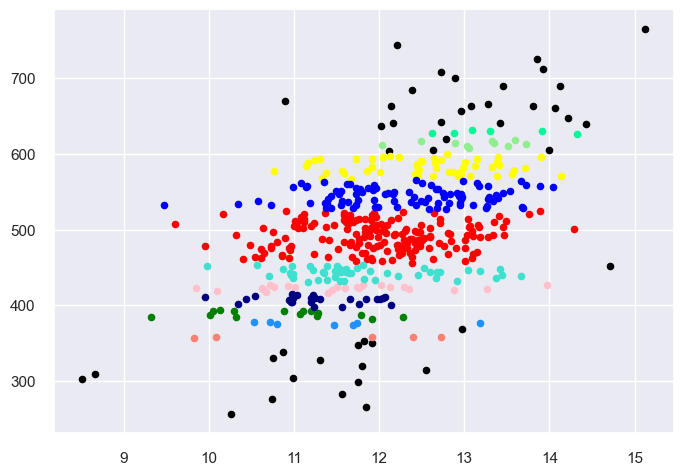

In [207]:
plt.scatter(X[labels==-1,0],X[labels==-1,1],s=20,c="black")
plt.scatter(X[labels==-0,0],X[labels==0,1],s=20,c="yellow")
plt.scatter(X[labels==1,0],X[labels==1,1],s=20,c="green")
plt.scatter(X[labels==2,0],X[labels==2,1],s=20,c="red")
plt.scatter(X[labels==3,0],X[labels==3,1],s=20,c="blue")
plt.scatter(X[labels==4,0],X[labels==4,1],s=20,c="pink")
plt.scatter(X[labels==5,0],X[labels==5,1],s=20,c="navy")
plt.scatter(X[labels==6,0],X[labels==6,1],s=20,c="turquoise")
plt.scatter(X[labels==7,0],X[labels==7,1],s=20,c="lightgreen")
plt.scatter(X[labels==8,0],X[labels==8,1],s=20,c="salmon")
plt.scatter(X[labels==9,0],X[labels==9,1],s=20,c="dodgerblue")
plt.scatter(X[labels==10,0],X[labels==10,1],s=20,c="mediumspringgreen")


plt.show()

In [208]:
score = silhouette_score(X, labels, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.382


In [308]:
gp = df.groupby('Cluster')
for gp_name,gp_data in gp:
 print("Cluster:" + str(gp_name))
 print(gp_data)

Cluster:0
                             Email      Avatar  Avg. Session Length  \
9                 bonnie69@lin.biz       Brown            31.936549   
10           andrew06@peterson.com      Tomato            33.992573   
14           taylormason@gmail.com    DarkBlue            32.387976   
15             jstark@anderson.com        Peru            30.737720   
17        rebecca45@hale-bauer.biz   OliveDrab            32.338899   
..                             ...         ...                  ...   
483             egomez@hotmail.com   MistyRose            33.606851   
484  kimberlyruiz@smith-gordon.com     DarkRed            33.448125   
490            brian28@sanchez.org  GhostWhite            34.695591   
492     davidsonkathleen@gmail.com    DarkBlue            33.680937   
498            cwilson@hotmail.com        Teal            33.322501   

     Time on App  Time on Website  Length of Membership  Yearly Amount Spent  \
9      -0.239987         0.083927             -0.331226  

In [310]:
%timeit 100+1

12.5 ns ± 0.567 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
